In [1]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv('../data/updated_music.csv')
data.drop(columns='Unnamed: 0',inplace=True)

In [6]:
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,uri,track_href,analysis_url,duration_ms,time_signature,song_name,artist_name,artist_genres,artist_pop,song_genre
0,0.482,0.721,0,-6.839,1,0.0321,0.731000,0.000000,0.1890,0.557,...,spotify:track:3AhXZa8sUQht0UEdBJgpGc,https://api.spotify.com/v1/tracks/3AhXZa8sUQht...,https://api.spotify.com/v1/audio-analysis/3AhX...,369600,4,Like a Rolling Stone,Bob Dylan,"['classic rock', 'country rock', 'folk', 'folk...",72,folk
1,0.485,0.863,1,-9.027,1,0.0495,0.000012,0.016200,0.1380,0.767,...,spotify:track:3oTlkzk1OtrhH8wBAduVEi,https://api.spotify.com/v1/tracks/3oTlkzk1Otrh...,https://api.spotify.com/v1/audio-analysis/3oTl...,300977,4,Smells Like Teen Spirit,Nirvana,"['grunge', 'permanent wave', 'rock']",82,grunge
2,0.364,0.457,4,-14.162,0,0.0675,0.290000,0.000106,0.9220,0.175,...,spotify:track:3ZFBeIyP41HhnALjxWy1pR,https://api.spotify.com/v1/tracks/3ZFBeIyP41Hh...,https://api.spotify.com/v1/audio-analysis/3ZFB...,337413,4,A Day In The Life - Remastered,The Beatles,"['beatlesque', 'british invasion', 'classic ro...",84,rock
3,0.398,0.413,1,-10.934,1,0.0388,0.082200,0.000025,0.0891,0.331,...,spotify:track:5Qt4Cc66g24QWwGP3YYV9y,https://api.spotify.com/v1/tracks/5Qt4Cc66g24Q...,https://api.spotify.com/v1/audio-analysis/5Qt4...,219147,4,Good Vibrations (Mono),The Beach Boys,"['adult standards', 'baroque pop', 'classic ro...",77,rock
4,0.518,0.756,10,-10.851,1,0.0915,0.735000,0.000062,0.3170,0.968,...,spotify:track:7MH2ZclofPlTrZOkPzZKhK,https://api.spotify.com/v1/tracks/7MH2ZclofPlT...,https://api.spotify.com/v1/audio-analysis/7MH2...,160893,4,Johnny B Goode,Chuck Berry,"['classic rock', 'rock', 'rock-and-roll', 'roc...",74,rock and roll


In [7]:
#function to turn artist genres string to list
def genre_list(self):
    split = self.strip().split(',')
    clean = [x.strip(" [']") for x in split]
    return clean

In [8]:
# convert the df to list
data['artist_genres'] = data['artist_genres'].apply(lambda x: genre_list(x))

In [9]:
#finding all the genres in the data set
all_genres_counts = {}
for row in data.artist_genres:
    for x in row:
        if x not in all_genres_counts:
            all_genres_counts[x] = 1
        else:
            all_genres_counts[x] += 1
    

In [10]:
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,uri,track_href,analysis_url,duration_ms,time_signature,song_name,artist_name,artist_genres,artist_pop,song_genre
0,0.482,0.721,0,-6.839,1,0.0321,0.731000,0.000000,0.1890,0.557,...,spotify:track:3AhXZa8sUQht0UEdBJgpGc,https://api.spotify.com/v1/tracks/3AhXZa8sUQht...,https://api.spotify.com/v1/audio-analysis/3AhX...,369600,4,Like a Rolling Stone,Bob Dylan,"[classic rock, country rock, folk, folk rock, ...",72,folk
1,0.485,0.863,1,-9.027,1,0.0495,0.000012,0.016200,0.1380,0.767,...,spotify:track:3oTlkzk1OtrhH8wBAduVEi,https://api.spotify.com/v1/tracks/3oTlkzk1Otrh...,https://api.spotify.com/v1/audio-analysis/3oTl...,300977,4,Smells Like Teen Spirit,Nirvana,"[grunge, permanent wave, rock]",82,grunge
2,0.364,0.457,4,-14.162,0,0.0675,0.290000,0.000106,0.9220,0.175,...,spotify:track:3ZFBeIyP41HhnALjxWy1pR,https://api.spotify.com/v1/tracks/3ZFBeIyP41Hh...,https://api.spotify.com/v1/audio-analysis/3ZFB...,337413,4,A Day In The Life - Remastered,The Beatles,"[beatlesque, british invasion, classic rock, m...",84,rock
3,0.398,0.413,1,-10.934,1,0.0388,0.082200,0.000025,0.0891,0.331,...,spotify:track:5Qt4Cc66g24QWwGP3YYV9y,https://api.spotify.com/v1/tracks/5Qt4Cc66g24Q...,https://api.spotify.com/v1/audio-analysis/5Qt4...,219147,4,Good Vibrations (Mono),The Beach Boys,"[adult standards, baroque pop, classic rock, p...",77,rock
4,0.518,0.756,10,-10.851,1,0.0915,0.735000,0.000062,0.3170,0.968,...,spotify:track:7MH2ZclofPlTrZOkPzZKhK,https://api.spotify.com/v1/tracks/7MH2ZclofPlT...,https://api.spotify.com/v1/audio-analysis/7MH2...,160893,4,Johnny B Goode,Chuck Berry,"[classic rock, rock, rock-and-roll, rockabilly]",74,rock and roll


In [11]:
genre_df = data[['song_genre', 'danceability','energy','acousticness','valence','artist_pop']].copy()

In [12]:
top10_genres = genre_df.nlargest(10, 'artist_pop')

fig = px.bar(top10_genres, x='song_genre', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group')


fig.update_layout(
    yaxis = dict(
        tickmode = 'linear',
        tick0 = 0,
        dtick = 0.2
    )
)
fig.show()

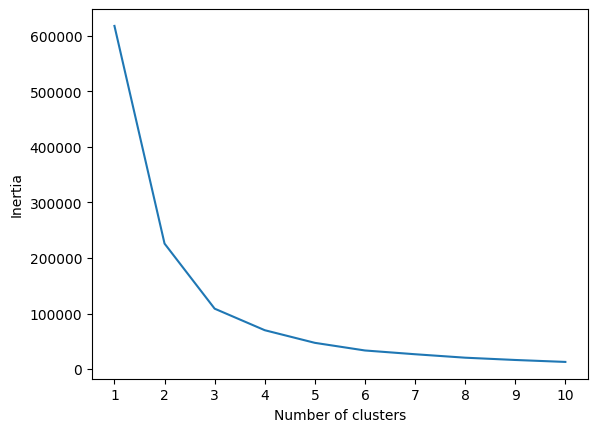

In [13]:
inertia = []
k = list(range(1, 11))

# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(genre_df.drop(columns='song_genre'))
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [14]:
cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10, random_state=0))])
X = genre_df.select_dtypes(np.number)
cluster_pipeline.fit(X)
genre_df['cluster'] = cluster_pipeline.predict(X)

In [15]:
tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_df['song_genre']
projection['cluster'] = genre_df['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2425 samples in 0.010s...
[t-SNE] Computed neighbors for 2425 samples in 0.072s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2425
[t-SNE] Computed conditional probabilities for sample 2000 / 2425
[t-SNE] Computed conditional probabilities for sample 2425 / 2425
[t-SNE] Mean sigma: 0.491281
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.270851
[t-SNE] KL divergence after 1000 iterations: 1.385197


In [38]:
feature_cols=['acousticness', 'danceability', 'duration_ms', 'energy',
              'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
              'speechiness', 'tempo', 'time_signature', 'valence',
]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_df =scaler.fit_transform(data[feature_cols])

print(normalized_df[:2])

[[7.33935361e-01 4.41565918e-01 1.89591441e-01 7.22790641e-01
  0.00000000e+00 0.00000000e+00 1.82442272e-01 7.47788020e-01
  1.00000000e+00 1.46985134e-02 3.27091218e-01 7.50000000e-01
  5.50220172e-01]
 [1.08132685e-05 4.45020150e-01 1.42764730e-01 8.65931474e-01
  1.63141994e-02 9.09090909e-02 1.29394633e-01 6.80334186e-01
  1.00000000e+00 4.37614832e-02 4.55049648e-01 7.50000000e-01
  7.70392116e-01]]


In [39]:
from sklearn.metrics.pairwise import sigmoid_kernel
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import preprocessing

In [40]:
# Create a pandas series with song titles as indices and indices as series values 
indices = pd.Series(data.index, index=data['song_name']).drop_duplicates()

# Create cosine similarity matrix based on given matrix
cosine = cosine_similarity(normalized_df)

def generate_recommendation(song_name, model_type=cosine ):
    """
    Purpose: Function for song recommendations 
    Inputs: song title and type of similarity model
    Output: Pandas series of recommended songs
    """
    # Get song indices
    index=indices[song_name]
    # Get list of songs for given songs
    score=list(enumerate(model_type[index]))
    # Sort the most similar songs
    similarity_score = sorted(score,key = lambda x:x[1],reverse = True)
    # Select the top-20 recommend songs
    similarity_score = similarity_score[1:21]
    top_songs_index = [i[0] for i in similarity_score]
    # Top 20 recommended songs
    top_songs=data['song_name'].iloc[top_songs_index]
    return top_songs

In [41]:
print(generate_recommendation('Hotline Bling',cosine).values)

['Boys' 'Love Is The Drug' 'Rinse & Repeat'
 'Yeah! (feat. Lil Jon & Ludacris)' 'We Found Love' 'Stitches'
 'Sweet but Psycho' 'Genius Of Love' 'No Passa' 'Proud Mary' 'Atlas'
 'Voodoo Ray' 'Human Behaviour' 'Milkshake'
 'Love Galore (feat. Travis Scott)' 'Love Galore (feat. Travis Scott)'
 'Borderline' "Don't You (Forget About Me)" 'L.E.S Artistes' 'Love Train']


In [42]:
# initializing points in
# numpy arrays
point1 = np.array((1, 2, 3))
point2 = np.array((1, 1, 1))
# calculating Euclidean distance
# using linalg.norm()
dist = np.linalg.norm(point1 - point2)
# printing Euclidean distance
print(point1)
print(point2)
print(dist)

[1 2 3]
[1 1 1]
2.23606797749979


In [43]:
clean_df = data.iloc[35:55][['acousticness', 'danceability', 'energy',
              'liveness', 'loudness',
              'speechiness', 'valence', 'song_name']]
clean_df

,acousticness,danceability,energy,liveness,loudness,speechiness,valence,song_name
35,0.412000,0.571,0.908,0.0802,-8.208,0.0907,0.958,You Really Got Me
36,0.002490,0.646,0.770,0.0715,-6.596,0.2260,0.681,Crazy In Love (feat. Jay-Z)
37,0.006660,0.745,0.466,0.2720,-7.620,0.0864,0.303,Seven Nation Army
38,0.076700,0.672,0.841,0.1350,-5.992,0.0285,0.820,Losing My Religion
39,0.001050,0.304,0.901,0.1580,-7.756,0.0602,0.541,God Save The Queen
40,0.271000,0.414,0.404,0.3000,-9.928,0.0499,0.224,Bohemian Rhapsody - Remastered 2011
41,0.007080,0.757,0.758,0.1120,-7.873,0.0512,0.918,Blue Monday
42,0.008760,0.533,0.905,0.0698,-5.270,0.0754,0.486,Purple Haze
43,0.102000,0.623,0.709,0.0967,-9.818,0.0636,0.948,Louie Louie
44,0.290000,0.639,0.548,0.3660,-13.534,0.0394,0.887,I Want You Back


In [44]:
df_averages = clean_df.mean(axis=0)

In [45]:
df_averages

acousticness    0.191985
danceability    0.565450
energy          0.678600
liveness        0.150235
loudness       -8.241750
speechiness     0.063650
valence         0.655300
dtype: float64

In [46]:
search_variable = df_averages.idxmax()
search_variable

'energy'

In [47]:
distance = []

In [48]:
for index, row in clean_df.iterrows():
    point1 = df_averages[search_variable]
    point2 = np.array(row[search_variable])
    dist = np.linalg.norm(point1 - point2)
    distance.append(dist)

In [49]:
print(distance)

[0.22939999999999994, 0.09139999999999993, 0.21260000000000007, 0.16239999999999988, 0.22239999999999993, 0.27460000000000007, 0.07939999999999992, 0.22639999999999993, 0.03039999999999987, 0.13060000000000005, 0.09160000000000013, 0.2896000000000001, 0.11260000000000014, 0.013399999999999856, 0.013600000000000056, 0.10839999999999994, 0.15560000000000007, 0.046399999999999886, 0.019600000000000062, 0.09039999999999992]


In [50]:
clean_df[f'distance_for_{search_variable}'] = distance
clean_df.set_index('song_name', inplace= True)
y = clean_df['distance_for_energy'].idxmin()
print(y)

Waterloo Sunset - Stereo


In [51]:
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
from dotenv import load_dotenv

load_dotenv()
CLIENT_ID = os.getenv('CLIENT_ID')
CLIENT_SECRET = os.getenv('CLIENT_SECRET')

In [52]:
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [53]:
def extract_user_playlist(url):
    # Split the url and use Spotipy to retrieve the track information for each song in the playlist
    playlist_url = url.split("/")[4].split("?")[0]
    playlist_tracks = sp.playlist_tracks(playlist_url)

    # For loop to extract the necessary track information
    track_ids = []
    track_titles = []
    track_artist = []
    track_album_art = []
    track_album_url = []

    for track in playlist_tracks['items']:
        track_ids.append(track['track']['id'])
        track_titles.append(track['track']['name'])
        track_album_art.append(track['track']['album']['images'][2]['url'])
        track_album_url.append(track['track']['album']['external_urls']['spotify'])
        artist_list = []
        for artist in track['track']['artists']:
            artist_list.append(artist['name'])
        track_artist.append(artist_list[0])

    # Create a dataframe from the track_ids to bring in features
    features = sp.audio_features(track_ids)

    features_df = pd.DataFrame(data=features, columns=features[0].keys())
    features_df['title'] = track_titles
    features_df['artist'] = track_artist
    features_df['album_art'] = track_album_art
    features_df['album_url'] = track_album_url
    features_df = features_df[['artist','title','album_url','album_art','id','danceability','energy','loudness','speechiness','acousticness','liveness','valence']]
    
    return features_df

In [54]:
def song_chooser(url):
    user_df = extract_user_playlist(url)
    clean_df = user_df[['acousticness', 'danceability', 'energy','liveness', 'loudness', 'speechiness', 'valence', 'title']]
    user_avg_scores = clean_df.mean(axis=0)
    search_variable = user_avg_scores.idxmax()
    distance = []
    for index, row in clean_df.iterrows():
        point1 = user_avg_scores[search_variable]
        point2 = np.array(row[search_variable])
        dist = np.linalg.norm(point1 - point2)
        distance.append(dist)
    clean_df[f'distance_for_{search_variable}'] = distance
    clean_df.set_index('title', inplace= True)
    song_search = clean_df[f'distance_for_{search_variable}'].idxmin()
    return song_search


In [55]:
z = song_chooser('https://open.spotify.com/playlist/37i9dQZF1DXcBWIGoYBM5M?si=V2SBvVUBQk-uQFK0B4_m-g&nd=1')

In [56]:
print(generate_recommendation(z,cosine))

975                                                  Luka
1663                             Parklife - 2012 Remaster
1934                                             Sundress
893                                               Lucille
407                           Girls Just Want to Have Fun
1166                                         Radio, Radio
6                                              Be My Baby
1406                                             Badlands
847     Money (That's What I Want) - Single Version / ...
1043                                       Devils Haircut
1722                                           Bernadette
1444                                            Countdown
413                                      The Killing Moon
1155                                                Think
2141                                              Happier
2113                                           Rubberband
217                     (White Man) In Hammersmith Palais
1869          